In [122]:
import sys

import pandas as pd
import numpy as np
from scipy import signal

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import sqlite3 as lite
conn = lite.connect('/Users/b/Library/Containers/com.kamoamoa.smartppe.FaceBit-Companion/Data/Documents/db.sqlite')

In [167]:
def plot(df, event_id):
    pressure = df.where(df['type'] == 'pressure')
    temp = df.where(df['type'] == 'temperature')

    f, axarr = plt.subplots(2, figsize=(12,12), sharex=True)

    ax1 = sns.lineplot(
        x='datetime',
        y='value',
        data=pressure,
        color='r',
        label='pressure',
        ax=axarr[0]
    )
    ax1.set_title(f'Event {event_id}: Pressure')
    ax1.set_ylabel("mBar")

    ax2 = sns.lineplot(
        x='datetime',
        y='value',
        data=temp,
        color='b',
        label='temperature',
        ax=axarr[1]
    )
    ax2.set_title(f'Event {event_id}: Temperature')
    ax2.set_ylabel("Celsius")
    ax2.set_xlabel("Time (UTC)")

    plt.legend()
    return plt

In [171]:
def save_and_plot_events(event_df):
    for i, row in event_df.iterrows():
        time_series_query = f'''
            SELECT t.id, t.value, t.date, t.type, e.id as event_id, e.event_type 
            FROM time_series_measurement as t
            LEFT JOIN event as e ON e.id = t.event_id
            WHERE e.id == {row['id']}
            ORDER BY t.date DESC
        '''
        df = pd.read_sql_query(time_series_query, conn)

        # map date to datetime64
        df['datetime'] = df['date'].map(lambda date: datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%fZ'))
        plt = plot(df, row['id'])

        name = f'{row["event_type"]}_{row["id"]}'

        plt.savefig(f'events/{name}.png')
        df.to_csv(f'events/{name}.csv')

In [172]:
events_query = """
    SELECT * FROM event
"""

df_events = pd.read_sql_query(events_query, conn)
df_events.head()

,id,event_type,other_event_label,notes,start_date,end_date
0,1,normal_breathing,,"Sample event, nothing to record",2021-01-29T21:27:40.732Z,2021-01-29T21:27:53.962Z
1,2,normal_breathing,,kn95,2021-01-29T21:30:25.805Z,2021-01-29T21:31:13.355Z
2,3,normal_breathing,,,2021-01-29T22:02:02.410Z,2021-01-29T22:02:45.909Z


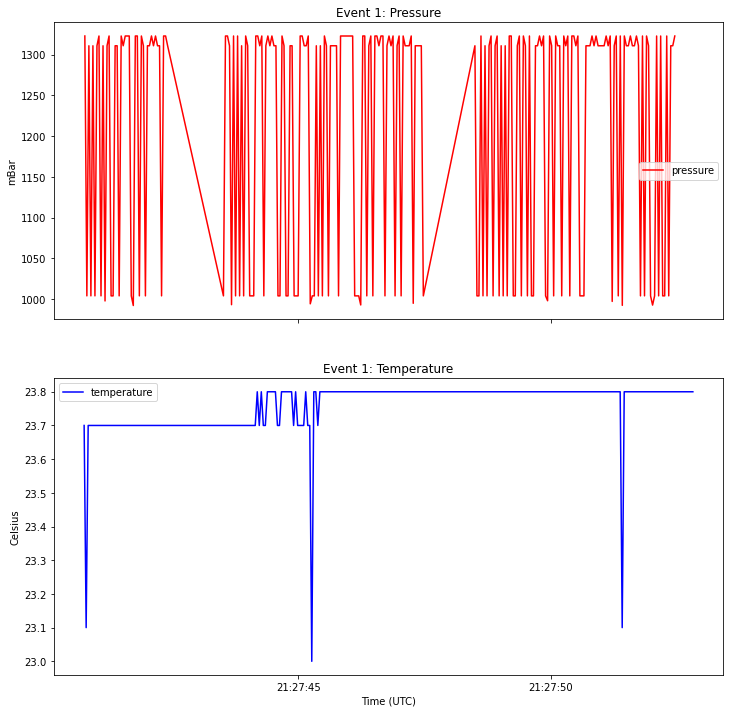

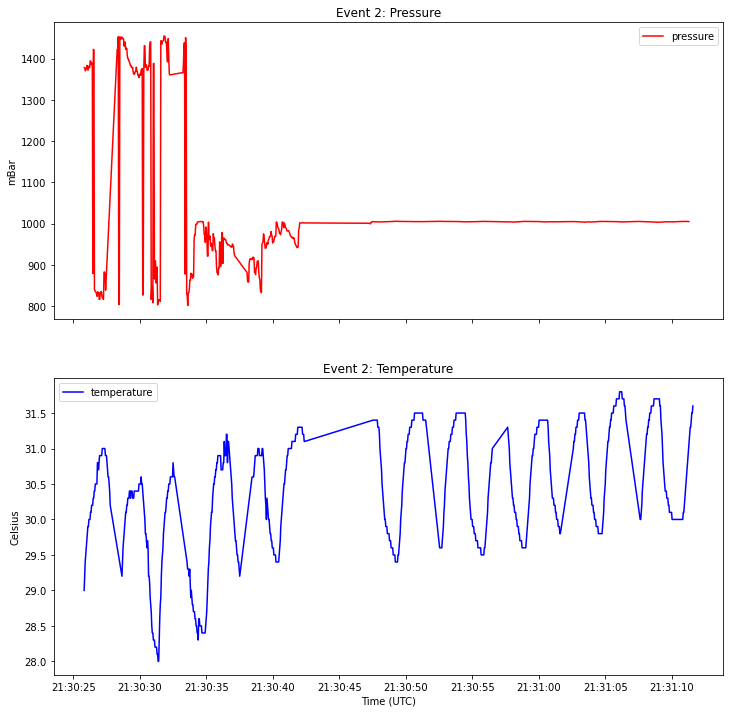

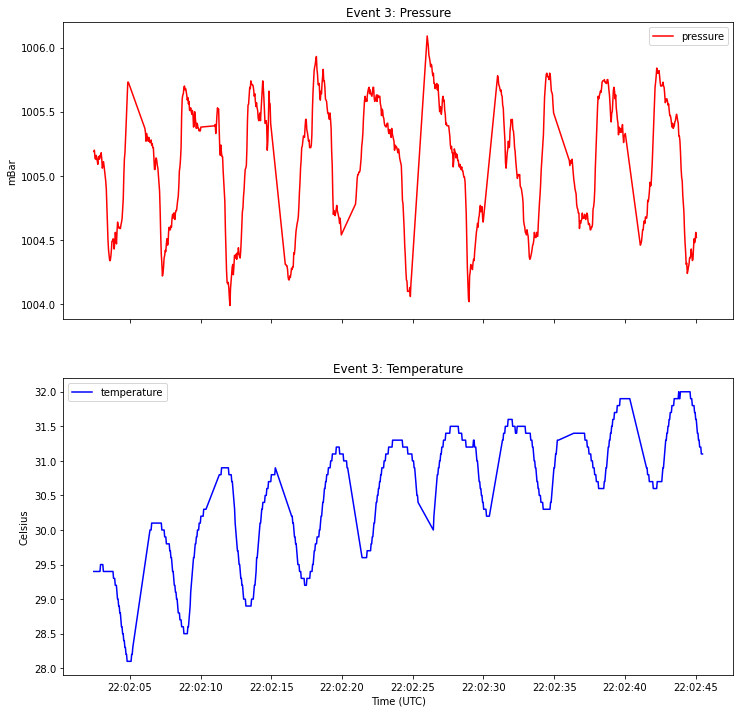

In [173]:
save_and_plot_events(df_events)